# Data Science Assignment - 1.A

Submitted By : Subrat Nanda

Import Libraries

In [ ]:
# Import Necessary Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.utils
from keras import utils as np_utils
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D



Calling mnist.load_data() function to get training data with its labels and also the testing data with its labels.

In [ ]:
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Data Preprocessing

Dimension of the training data is (60000*28*28).

In [ ]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Feature Normalization
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Convert labels to One Hot Encoded
# num_digits = 10
# y_train = keras.utils.to_categorical(y_train, num_digits)
# y_test = keras.utils.to_categorical(y_test, num_digits)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Display size of train and test x

print('Shape of Train Image : ',x_train.shape)
print('Shape of Test Image : ',x_test.shape)
print("Length of Train = ",str(len(x_train)))
print("Length of Test = ",str(len(x_test)))

Shape of Train Image :  (60000, 784)
Shape of Test Image :  (10000, 784)
Length of Train =  60000
Length of Test =  10000


In [ ]:
# Display size of train and test y

print('Shape of Train Image : ',y_train.shape)
print('Shape of Test Image : ',y_test.shape)
print("Length of Train = ",str(len(y_train)))
print("Length of Test = ",str(len(y_test)))

Shape of Train Image :  (60000,)
Shape of Test Image :  (10000,)
Length of Train =  60000
Length of Test =  10000


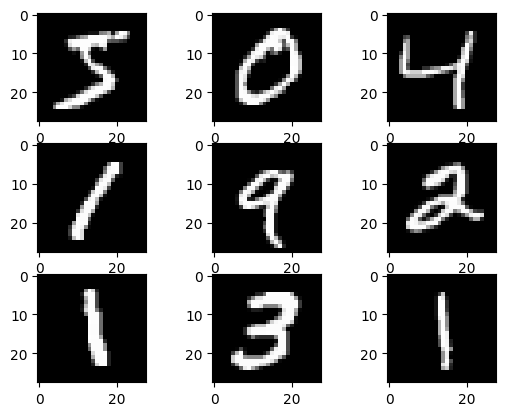

In [ ]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

#### a. Use 10 fold cross validation.

**K-fold Cross-Validation**

**Steps:**
1. Split training data into K equal parts
2. Fit the model on k-1 parts and calculate test error using the fitted model on the kth part
3. Repeat k times, using each data subset as the test set once. (usually k= 5~20)

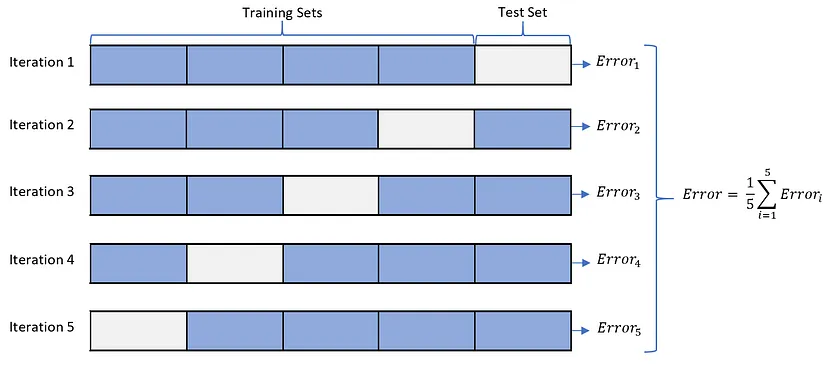

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_curve

In [ ]:
# Create the logistic regression model
log_reg = LogisticRegression(solver='liblinear',multi_class='ovr')

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(log_reg, x_train, y_train, cv=10, scoring='accuracy')

In [ ]:
# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: Accuracy = {score}")

Fold 1: Accuracy = 0.9205
Fold 2: Accuracy = 0.9151666666666667
Fold 3: Accuracy = 0.9031666666666667
Fold 4: Accuracy = 0.9211666666666667
Fold 5: Accuracy = 0.9136666666666666
Fold 6: Accuracy = 0.911
Fold 7: Accuracy = 0.909
Fold 8: Accuracy = 0.9103333333333333
Fold 9: Accuracy = 0.9098333333333334
Fold 10: Accuracy = 0.9328333333333333
